In [82]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 

In [83]:
pd.set_option('display.max_columns', 40)

In [84]:
weatherv = pd.read_csv("seattle-weather.csv") 

weatherv

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [85]:
weatherv.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [86]:
data = weatherv.copy()

In [87]:
data.dtypes.value_counts()

float64    4
object     2
Name: count, dtype: int64

In [88]:
data['weather'].value_counts()  

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

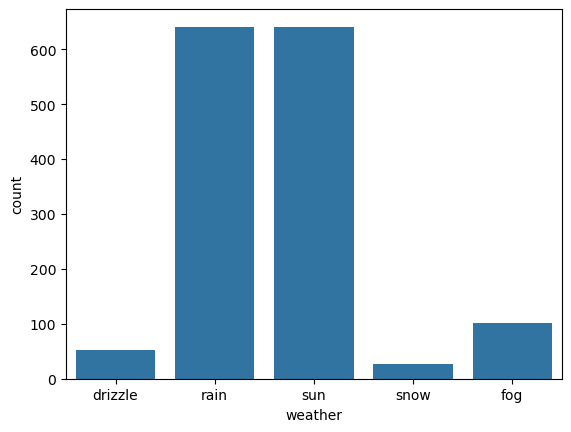

In [89]:
sns.countplot(x='weather', data=data)

In [90]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [91]:
dataset = data.copy()

In [92]:
#To Convert the 'date' column to a datetime object
dataset['date'] = pd.to_datetime(dataset['date'])

dataset.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [93]:
# 2.To Extract numerical features that the model can understand
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day

# 3.To Drop the original date column
# We keep a copy of the processed data for training
df_entire = dataset.drop(['date'], axis=1)

# Let's see the new structure
df_entire.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5


In [94]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_entire['weather_label'] = encoder.fit_transform(df_entire['weather'])

df_entire

,precipitation,temp_max,temp_min,wind,weather,year,month,day,weather_label
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1,0
1,10.9,10.6,2.8,4.5,rain,2012,1,2,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3,2
3,20.3,12.2,5.6,4.7,rain,2012,1,4,2
4,1.3,8.9,2.8,6.1,rain,2012,1,5,2
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,2015,12,27,2
1457,1.5,5.0,1.7,1.3,rain,2015,12,28,2
1458,0.0,7.2,0.6,2.6,fog,2015,12,29,1
1459,0.0,5.6,-1.0,3.4,sun,2015,12,30,4


In [95]:
df_final = df_entire.drop(['weather'],axis=1)

In [96]:
df_final.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
year               int32
month              int32
day                int32
weather_label      int64
dtype: object

In [135]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

weatherv['weather_encoded'] = le.fit_transform(weatherv['weather'])

# Verify the mapping
# This creates a small table showing which number belongs to which weather
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("The Mapping is:", mapping)


weatherv[['weather', 'weather_encoded']].head(10)

The Mapping is: {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}


,weather,weather_encoded
0,drizzle,0
1,rain,2
2,rain,2
3,rain,2
4,rain,2
5,rain,2
6,rain,2
7,sun,4
8,rain,2
9,rain,2


Text(0.5, 1.0, 'correlation between variables of our dataset')

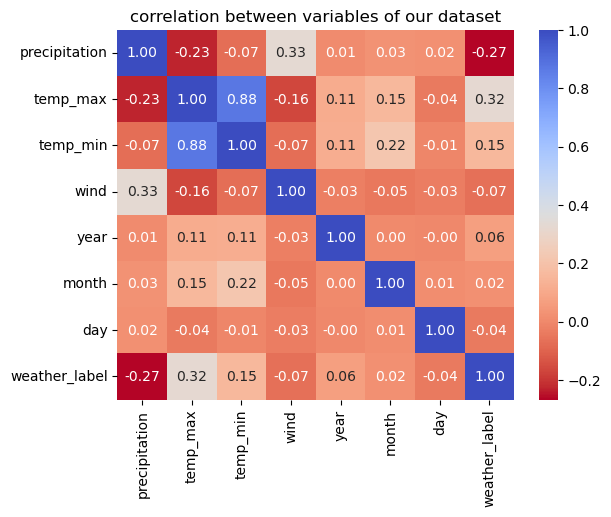

In [134]:
sns.heatmap(df_final.corr(),annot=True,fmt=".2f",cmap="coolwarm_r")
plt.title("correlation between variables of our dataset")

In [99]:
df_final

,precipitation,temp_max,temp_min,wind,year,month,day,weather_label
0,0.0,12.8,5.0,4.7,2012,1,1,0
1,10.9,10.6,2.8,4.5,2012,1,2,2
2,0.8,11.7,7.2,2.3,2012,1,3,2
3,20.3,12.2,5.6,4.7,2012,1,4,2
4,1.3,8.9,2.8,6.1,2012,1,5,2
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2015,12,27,2
1457,1.5,5.0,1.7,1.3,2015,12,28,2
1458,0.0,7.2,0.6,2.6,2015,12,29,1
1459,0.0,5.6,-1.0,3.4,2015,12,30,4


In [100]:
X = df_final.drop("weather_label",axis=1)
y = df_final['weather_label']

<Axes: ylabel='weather_label'>

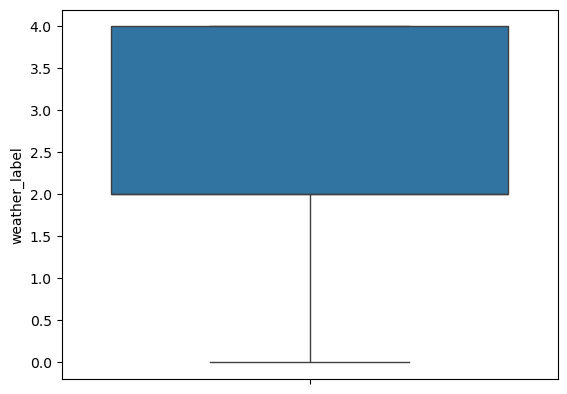

In [101]:
sns.boxplot(y)

Text(0.5, 1.0, 'Distribution de y')

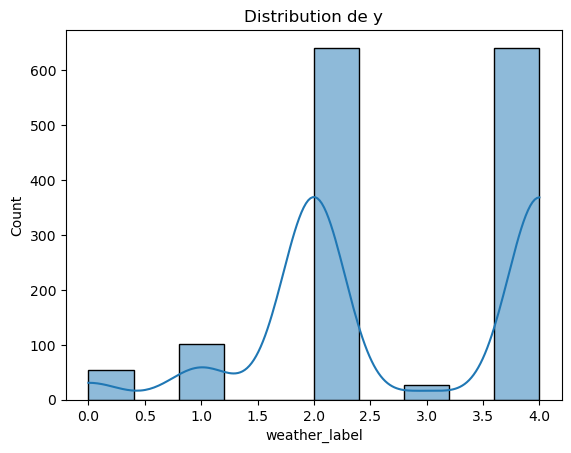

In [102]:
sns.histplot(y,bins=10,kde=True)
plt.title("Distribution de y")

In [103]:
correlation = X.join(y).corr()['weather_label'].drop("weather_label")
correlation.sort_values(ascending=True)

precipitation   -0.267388
wind            -0.065858
day             -0.040939
month            0.022880
year             0.064560
temp_min         0.154981
temp_max         0.322337
Name: weather_label, dtype: float64

Text(0.5, 1.0, 'Most useful variables ranking')

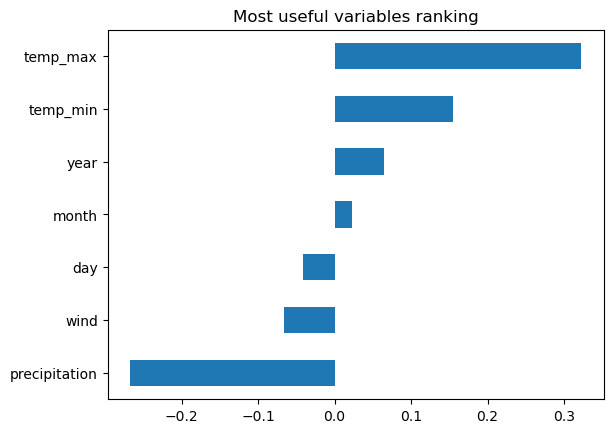

In [133]:
correlation.sort_values().plot(kind="barh")
plt.title("Most useful variables ranking")

In [105]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [106]:
X_train 

,precipitation,temp_max,temp_min,wind,year,month,day
1067,0.0,10.0,0.0,3.6,2014,12,3
653,0.0,15.6,5.0,0.9,2013,10,15
739,5.8,9.4,5.6,6.3,2014,1,9
1270,0.0,25.6,16.1,2.6,2015,6,24
467,9.7,7.8,4.4,4.6,2013,4,12
...,...,...,...,...,...,...,...
1016,7.6,21.1,10.0,3.1,2014,10,13
165,0.0,17.2,10.0,2.7,2012,6,14
7,0.0,10.0,2.8,2.0,2012,1,8
219,0.0,21.1,15.0,2.6,2012,8,7


In [107]:
X_train_df = X_train.copy()
X_test_df = X_test.copy()

from sklearn.preprocessing import PolynomialFeatures 

feature_engineer = PolynomialFeatures(2)

X_train_df_eng = pd.DataFrame(feature_engineer.fit_transform(X_train),columns=feature_engineer.get_feature_names_out(X_train.columns))
X_test_df_eng = pd.DataFrame(feature_engineer.transform(X_test),columns=feature_engineer.get_feature_names_out(X_test.columns))

X_train_df_eng

,1,precipitation,temp_max,temp_min,wind,year,month,day,precipitation^2,precipitation temp_max,precipitation temp_min,precipitation wind,precipitation year,precipitation month,precipitation day,temp_max^2,temp_max temp_min,temp_max wind,temp_max year,temp_max month,temp_max day,temp_min^2,temp_min wind,temp_min year,temp_min month,temp_min day,wind^2,wind year,wind month,wind day,year^2,year month,year day,month^2,month day,day^2
0,1.0,0.0,10.0,0.0,3.6,2014.0,12.0,3.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,100.00,0.00,36.00,20140.0,120.0,30.0,0.00,0.00,0.0,0.0,0.0,12.96,7250.4,43.2,10.8,4056196.0,24168.0,6042.0,144.0,36.0,9.0
1,1.0,0.0,15.6,5.0,0.9,2013.0,10.0,15.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,243.36,78.00,14.04,31402.8,156.0,234.0,25.00,4.50,10065.0,50.0,75.0,0.81,1811.7,9.0,13.5,4052169.0,20130.0,30195.0,100.0,150.0,225.0
2,1.0,5.8,9.4,5.6,6.3,2014.0,1.0,9.0,33.64,54.52,32.48,36.54,11681.2,5.8,52.2,88.36,52.64,59.22,18931.6,9.4,84.6,31.36,35.28,11278.4,5.6,50.4,39.69,12688.2,6.3,56.7,4056196.0,2014.0,18126.0,1.0,9.0,81.0
3,1.0,0.0,25.6,16.1,2.6,2015.0,6.0,24.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,655.36,412.16,66.56,51584.0,153.6,614.4,259.21,41.86,32441.5,96.6,386.4,6.76,5239.0,15.6,62.4,4060225.0,12090.0,48360.0,36.0,144.0,576.0
4,1.0,9.7,7.8,4.4,4.6,2013.0,4.0,12.0,94.09,75.66,42.68,44.62,19526.1,38.8,116.4,60.84,34.32,35.88,15701.4,31.2,93.6,19.36,20.24,8857.2,17.6,52.8,21.16,9259.8,18.4,55.2,4052169.0,8052.0,24156.0,16.0,48.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1.0,7.6,21.1,10.0,3.1,2014.0,10.0,13.0,57.76,160.36,76.00,23.56,15306.4,76.0,98.8,445.21,211.00,65.41,42495.4,211.0,274.3,100.00,31.00,20140.0,100.0,130.0,9.61,6243.4,31.0,40.3,4056196.0,20140.0,26182.0,100.0,130.0,169.0
1164,1.0,0.0,17.2,10.0,2.7,2012.0,6.0,14.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,295.84,172.00,46.44,34606.4,103.2,240.8,100.00,27.00,20120.0,60.0,140.0,7.29,5432.4,16.2,37.8,4048144.0,12072.0,28168.0,36.0,84.0,196.0
1165,1.0,0.0,10.0,2.8,2.0,2012.0,1.0,8.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,100.00,28.00,20.00,20120.0,10.0,80.0,7.84,5.60,5633.6,2.8,22.4,4.00,4024.0,2.0,16.0,4048144.0,2012.0,16096.0,1.0,8.0,64.0
1166,1.0,0.0,21.1,15.0,2.6,2012.0,8.0,7.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,445.21,316.50,54.86,42453.2,168.8,147.7,225.00,39.00,30180.0,120.0,105.0,6.76,5231.2,20.8,18.2,4048144.0,16096.0,14084.0,64.0,56.0,49.0


In [108]:
X_train_df_eng

,1,precipitation,temp_max,temp_min,wind,year,month,day,precipitation^2,precipitation temp_max,precipitation temp_min,precipitation wind,precipitation year,precipitation month,precipitation day,temp_max^2,temp_max temp_min,temp_max wind,temp_max year,temp_max month,temp_max day,temp_min^2,temp_min wind,temp_min year,temp_min month,temp_min day,wind^2,wind year,wind month,wind day,year^2,year month,year day,month^2,month day,day^2
0,1.0,0.0,10.0,0.0,3.6,2014.0,12.0,3.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,100.00,0.00,36.00,20140.0,120.0,30.0,0.00,0.00,0.0,0.0,0.0,12.96,7250.4,43.2,10.8,4056196.0,24168.0,6042.0,144.0,36.0,9.0
1,1.0,0.0,15.6,5.0,0.9,2013.0,10.0,15.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,243.36,78.00,14.04,31402.8,156.0,234.0,25.00,4.50,10065.0,50.0,75.0,0.81,1811.7,9.0,13.5,4052169.0,20130.0,30195.0,100.0,150.0,225.0
2,1.0,5.8,9.4,5.6,6.3,2014.0,1.0,9.0,33.64,54.52,32.48,36.54,11681.2,5.8,52.2,88.36,52.64,59.22,18931.6,9.4,84.6,31.36,35.28,11278.4,5.6,50.4,39.69,12688.2,6.3,56.7,4056196.0,2014.0,18126.0,1.0,9.0,81.0
3,1.0,0.0,25.6,16.1,2.6,2015.0,6.0,24.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,655.36,412.16,66.56,51584.0,153.6,614.4,259.21,41.86,32441.5,96.6,386.4,6.76,5239.0,15.6,62.4,4060225.0,12090.0,48360.0,36.0,144.0,576.0
4,1.0,9.7,7.8,4.4,4.6,2013.0,4.0,12.0,94.09,75.66,42.68,44.62,19526.1,38.8,116.4,60.84,34.32,35.88,15701.4,31.2,93.6,19.36,20.24,8857.2,17.6,52.8,21.16,9259.8,18.4,55.2,4052169.0,8052.0,24156.0,16.0,48.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1.0,7.6,21.1,10.0,3.1,2014.0,10.0,13.0,57.76,160.36,76.00,23.56,15306.4,76.0,98.8,445.21,211.00,65.41,42495.4,211.0,274.3,100.00,31.00,20140.0,100.0,130.0,9.61,6243.4,31.0,40.3,4056196.0,20140.0,26182.0,100.0,130.0,169.0
1164,1.0,0.0,17.2,10.0,2.7,2012.0,6.0,14.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,295.84,172.00,46.44,34606.4,103.2,240.8,100.00,27.00,20120.0,60.0,140.0,7.29,5432.4,16.2,37.8,4048144.0,12072.0,28168.0,36.0,84.0,196.0
1165,1.0,0.0,10.0,2.8,2.0,2012.0,1.0,8.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,100.00,28.00,20.00,20120.0,10.0,80.0,7.84,5.60,5633.6,2.8,22.4,4.00,4024.0,2.0,16.0,4048144.0,2012.0,16096.0,1.0,8.0,64.0
1166,1.0,0.0,21.1,15.0,2.6,2012.0,8.0,7.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,445.21,316.50,54.86,42453.2,168.8,147.7,225.00,39.00,30180.0,120.0,105.0,6.76,5231.2,20.8,18.2,4048144.0,16096.0,14084.0,64.0,56.0,49.0


Text(0.5, 1.0, 'correlation between all of our variables')

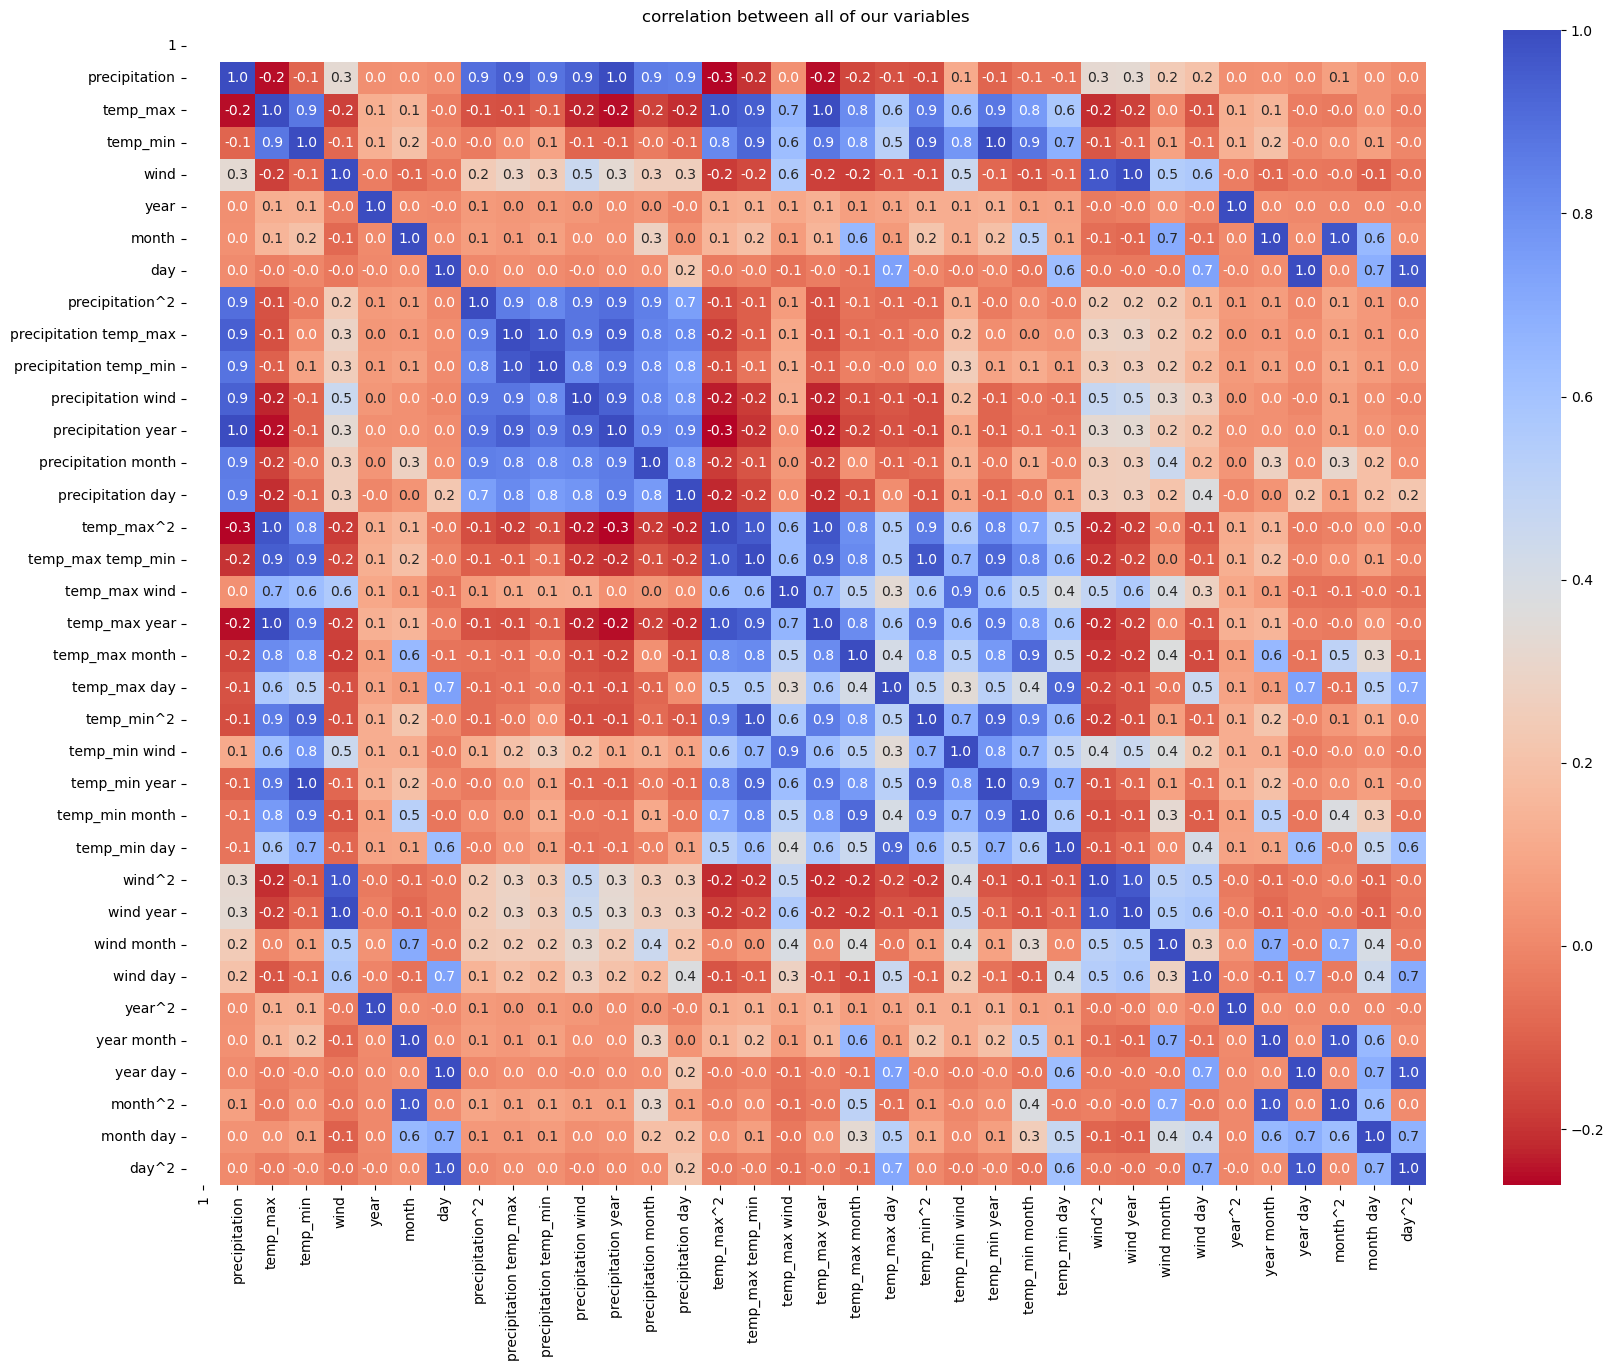

In [132]:
plt.figure(figsize=(20,15))

sns.heatmap(X_train_df_eng.corr(),annot=True,fmt=".1f",cmap="coolwarm_r")#linewidths=0.5) #mask=np.triu(X_train_df.corr()))
plt.title("correlation between all of our variables")

In [110]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_train_r, y_train_resampled = smote.fit_resample(X_train_df_eng, y_train)

In [111]:
from sklearn.ensemble import RandomForestClassifier

voisin = RandomForestClassifier(criterion= 'entropy',
                                max_depth= 10, 
                                min_samples_split= 5,
                                n_estimators = 100)

model = voisin.fit(X_train_df_eng,y_train)

In [112]:
model

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metri

In [113]:
model.score(X_test_df_eng,y_test)

0.8464163822525598

In [114]:
y_pred = model.predict(X_test_df_eng)

In [115]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("Root_mean_squared_error:",np.sqrt(mean_squared_error(y_test,y_pred)))

mean_absolute_error: 0.4709897610921502
Root_mean_squared_error: 1.2447843406018202


In [116]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     drizzle       0.67      0.12      0.21        16
         fog       0.75      0.25      0.38        24
        rain       0.98      0.94      0.96       126
        snow       1.00      0.60      0.75         5
         sun       0.75      0.98      0.85       122

    accuracy                           0.85       293
   macro avg       0.83      0.58      0.63       293
weighted avg       0.85      0.85      0.82       293

Confusion Matrix:
 [[  2   0   0   0  14]
 [  0   6   0   0  18]
 [  0   0 118   0   8]
 [  0   0   2   3   0]
 [  1   2   0   0 119]]


In [117]:
cm = confusion_matrix(y_test, y_pred)

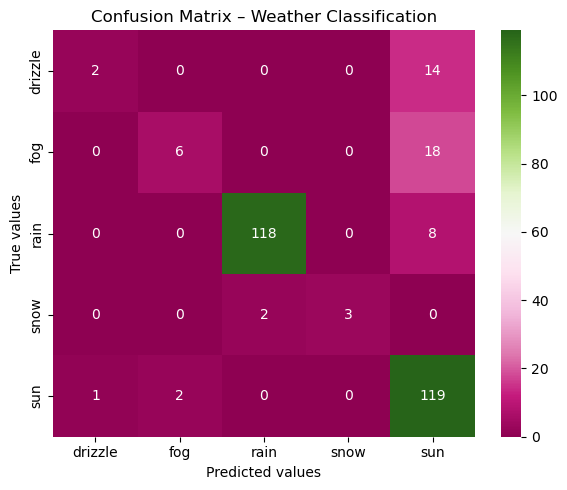

In [118]:
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap= "PiYG",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix – Weather Classification")

plt.tight_layout()
plt.show()


# New Data for future predictions

In [119]:
import pandas as pd
import numpy as np

# New data matching your dataset structure
new_data = pd.DataFrame({
    'precipitation': [0.0, 5.2, 15.3, 0.8, 0.0, 2.1, 25.4, 0.0, 1.5, 8.9, 0.3, 12.7, 0.0, 3.2, 0.0, 18.5, 0.1, 7.3, 0.0, 22.1],
    'temp_max': [25.6, 12.8, 8.9, 15.0, 28.3, 14.4, 10.0, 22.2, 16.7, 11.1, 20.0, 9.4, 26.7, 13.3, 24.4, 7.8, 19.4, 10.6, 27.2, 6.7],
    'temp_min': [15.0, 8.3, 5.6, 10.6, 17.2, 9.4, 6.7, 13.9, 11.1, 7.8, 12.2, 6.1, 16.1, 8.9, 15.6, 4.4, 11.7, 7.2, 16.7, 3.9],
    'wind': [2.3, 4.1, 5.8, 3.2, 1.8, 3.7, 6.2, 2.1, 3.5, 4.9, 2.8, 5.3, 2.0, 4.3, 2.5, 5.9, 3.1, 4.7, 2.2, 6.5],
    'year': [2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
    'month': [7, 11, 12, 10, 8, 11, 1, 7, 10, 11, 9, 12, 7, 11, 8, 1, 9, 12, 6, 1],
    'day': [15, 8, 22, 3, 12, 18, 10, 25, 14, 28, 5, 15, 20, 12, 8, 25, 18, 5, 22, 18]
})

new_data

,precipitation,temp_max,temp_min,wind,year,month,day
0,0.0,25.6,15.0,2.3,2016,7,15
1,5.2,12.8,8.3,4.1,2016,11,8
2,15.3,8.9,5.6,5.8,2016,12,22
3,0.8,15.0,10.6,3.2,2016,10,3
4,0.0,28.3,17.2,1.8,2016,8,12
5,2.1,14.4,9.4,3.7,2016,11,18
6,25.4,10.0,6.7,6.2,2016,1,10
7,0.0,22.2,13.9,2.1,2016,7,25
8,1.5,16.7,11.1,3.5,2016,10,14
9,8.9,11.1,7.8,4.9,2016,11,28


In [120]:
new_data_eng = pd.DataFrame(feature_engineer.transform(new_data), columns=feature_engineer.get_feature_names_out(new_data.columns))

new_data_eng

,1,precipitation,temp_max,temp_min,wind,year,month,day,precipitation^2,precipitation temp_max,precipitation temp_min,precipitation wind,precipitation year,precipitation month,precipitation day,temp_max^2,temp_max temp_min,temp_max wind,temp_max year,temp_max month,temp_max day,temp_min^2,temp_min wind,temp_min year,temp_min month,temp_min day,wind^2,wind year,wind month,wind day,year^2,year month,year day,month^2,month day,day^2
0,1.0,0.0,25.6,15.0,2.3,2016.0,7.0,15.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,655.36,384.00,58.88,51609.6,179.2,384.0,225.00,34.50,30240.0,105.0,225.0,5.29,4636.8,16.1,34.5,4064256.0,14112.0,30240.0,49.0,105.0,225.0
1,1.0,5.2,12.8,8.3,4.1,2016.0,11.0,8.0,27.04,66.56,43.16,21.32,10483.2,57.2,41.6,163.84,106.24,52.48,25804.8,140.8,102.4,68.89,34.03,16732.8,91.3,66.4,16.81,8265.6,45.1,32.8,4064256.0,22176.0,16128.0,121.0,88.0,64.0
2,1.0,15.3,8.9,5.6,5.8,2016.0,12.0,22.0,234.09,136.17,85.68,88.74,30844.8,183.6,336.6,79.21,49.84,51.62,17942.4,106.8,195.8,31.36,32.48,11289.6,67.2,123.2,33.64,11692.8,69.6,127.6,4064256.0,24192.0,44352.0,144.0,264.0,484.0
3,1.0,0.8,15.0,10.6,3.2,2016.0,10.0,3.0,0.64,12.00,8.48,2.56,1612.8,8.0,2.4,225.00,159.00,48.00,30240.0,150.0,45.0,112.36,33.92,21369.6,106.0,31.8,10.24,6451.2,32.0,9.6,4064256.0,20160.0,6048.0,100.0,30.0,9.0
4,1.0,0.0,28.3,17.2,1.8,2016.0,8.0,12.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,800.89,486.76,50.94,57052.8,226.4,339.6,295.84,30.96,34675.2,137.6,206.4,3.24,3628.8,14.4,21.6,4064256.0,16128.0,24192.0,64.0,96.0,144.0
5,1.0,2.1,14.4,9.4,3.7,2016.0,11.0,18.0,4.41,30.24,19.74,7.77,4233.6,23.1,37.8,207.36,135.36,53.28,29030.4,158.4,259.2,88.36,34.78,18950.4,103.4,169.2,13.69,7459.2,40.7,66.6,4064256.0,22176.0,36288.0,121.0,198.0,324.0
6,1.0,25.4,10.0,6.7,6.2,2016.0,1.0,10.0,645.16,254.00,170.18,157.48,51206.4,25.4,254.0,100.00,67.00,62.00,20160.0,10.0,100.0,44.89,41.54,13507.2,6.7,67.0,38.44,12499.2,6.2,62.0,4064256.0,2016.0,20160.0,1.0,10.0,100.0
7,1.0,0.0,22.2,13.9,2.1,2016.0,7.0,25.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,492.84,308.58,46.62,44755.2,155.4,555.0,193.21,29.19,28022.4,97.3,347.5,4.41,4233.6,14.7,52.5,4064256.0,14112.0,50400.0,49.0,175.0,625.0
8,1.0,1.5,16.7,11.1,3.5,2016.0,10.0,14.0,2.25,25.05,16.65,5.25,3024.0,15.0,21.0,278.89,185.37,58.45,33667.2,167.0,233.8,123.21,38.85,22377.6,111.0,155.4,12.25,7056.0,35.0,49.0,4064256.0,20160.0,28224.0,100.0,140.0,196.0
9,1.0,8.9,11.1,7.8,4.9,2016.0,11.0,28.0,79.21,98.79,69.42,43.61,17942.4,97.9,249.2,123.21,86.58,54.39,22377.6,122.1,310.8,60.84,38.22,15724.8,85.8,218.4,24.01,9878.4,53.9,137.2,4064256.0,22176.0,56448.0,121.0,308.0,784.0


In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['weather_encoded'] = le.fit_transform(data['weather'])

#Verify the mapping

mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("The Mapping is:", mapping)

The Mapping is: {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}


In [127]:
# Make predictions with trained model

predictions = model.predict(new_data_eng)

# To decode the predictions back to original weather labels

predicted_weather = encoder.inverse_transform(predictions)

# Create results dataframe
results = new_data.copy()
results['predicted_weather'] = predicted_weather


print("PREDICTION RESULTS:")
print(results[['precipitation', 'temp_max', 'temp_min', 'wind', 'month', 'predicted_weather']])

print("Prediction Distribution:")
print()
print(results['predicted_weather'].value_counts())

PREDICTION RESULTS:
    precipitation  temp_max  temp_min  wind  month predicted_weather
0             0.0      25.6      15.0   2.3      7               sun
1             5.2      12.8       8.3   4.1     11              rain
2            15.3       8.9       5.6   5.8     12              rain
3             0.8      15.0      10.6   3.2     10              rain
4             0.0      28.3      17.2   1.8      8               sun
5             2.1      14.4       9.4   3.7     11              rain
6            25.4      10.0       6.7   6.2      1              rain
7             0.0      22.2      13.9   2.1      7               sun
8             1.5      16.7      11.1   3.5     10              rain
9             8.9      11.1       7.8   4.9     11              rain
10            0.3      20.0      12.2   2.8      9              rain
11           12.7       9.4       6.1   5.3     12              rain
12            0.0      26.7      16.1   2.0      7               sun
13            

# Let's try to train our model again using XGBClassifier Algorithm. 

In [128]:
from xgboost import XGBClassifier

xgclassifier = XGBClassifier()

xgclassifier.fit(X_train_df_eng,y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [129]:
y_pred_xgb = xgclassifier.predict(X_test_df_eng)

In [130]:
print(xgclassifier.score(X_test_df_eng,y_test))

print("mae:",mean_absolute_error(y_test,y_pred))
print("RMSE:",mean_squared_error(y_test,y_pred))

0.8293515358361775
mae: 0.4709897610921502
RMSE: 1.5494880546075085
